# Titanic Kaggle competition

# Data visualization

In [29]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Heatmap correlation between features and target

In [8]:
import seaborn

<AxesSubplot:>

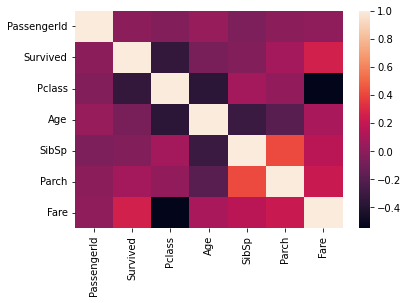

In [9]:
seaborn.heatmap(df.corr())

In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
corrmat = df.corr()

In [15]:
type(corrmat)

pandas.core.frame.DataFrame

In [16]:
sorted_corrmat = corrmat['Survived'].abs().sort_values()

In [17]:
sorted_corrmat

PassengerId    0.005007
SibSp          0.035322
Age            0.077221
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64

We can see that the more correlated feature is Pclass.  
We are going to construct our base model on this feature.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
basic_model = LogisticRegression(solver='liblinear')
basic_model.fit(df[['Pclass']], df['Survived'])

LogisticRegression(solver='liblinear')

# Predictions with basic model

In [20]:
test_df = pd.read_csv('test.csv')

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [39]:
predictions_basic_model = basic_model.predict(test_df[['Pclass']])

In [40]:
predictions_basic_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [41]:
submission_basic_model = pd.DataFrame(test_df['PassengerId'])

In [42]:
submission_basic_model

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [43]:
type(submission_basic_model)

pandas.core.frame.DataFrame

In [46]:
submission_basic_model['Survived'] = predictions_basic_model

In [47]:
submission_basic_model

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
submission_basic_model.to_csv('submission_basic_model.csv', index=False)

## Accuracy score on test set : 0.67224

# Other model more elaborated

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.select_dtypes(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


## Name, Ticket and PassengerId not useful for prediction

In [120]:
df_used = df.drop(columns=['Name', 'PassengerId', 'Ticket'])

In [121]:
df_used

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


## Cabin values

In [122]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Too much values and too much missing values, drop this column 

In [123]:
df_used.drop(columns=['Cabin'], inplace=True)

In [124]:
df_used

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Categoric features

In [125]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [126]:
dummies_age = pd.get_dummies(df_used['Age'])

In [127]:
dummies_age

,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
import plotly.graph_objects as go

df_survived = df_used[df_used['Survived'] == 1]
night_colors = ['#D3DBDD',  'navy']
labels = [x for x in df_survived.Sex.value_counts().index]
values = df_survived.Sex.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Female","Male"],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Percentage of male/female survivants")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

### We can see that sex could be important 

In [129]:
dummies_sex = pd.get_dummies(df_used['Sex'])

In [130]:
dummies_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [131]:
df_used = pd.concat([df_used, dummies_sex], axis=1)
df_used.drop(columns=['Sex'], inplace=True)

In [132]:
df_used

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [133]:
df_survived.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [134]:
labels = [x for x in df_survived.Embarked.value_counts().index]
values = df_survived.Embarked.value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Southampton","Cherbourg", "Queenstown"],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Percentage of survivants by embarked cities")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

### Cities have importance

In [139]:
dummies_cities = pd.get_dummies(df_used['Embarked'])

In [140]:
dummies_cities

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [141]:
df_used

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [142]:
df_used = pd.concat([df_used, dummies_cities], axis=1)

In [143]:
df_used

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,S,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,S,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,C,0,1,1,0,0


## Missing values

In [144]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   female    891 non-null    uint8  
 8   male      891 non-null    uint8  
 9   C         891 non-null    uint8  
 10  Q         891 non-null    uint8  
 11  S         891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(5)
memory usage: 53.2+ KB


In [145]:
df_used.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
female        0
male          0
C             0
Q             0
S             0
dtype: int64

In [146]:
df_used['Age'].mean()

29.69911764705882

In [147]:
df_used['Age'].fillna(df_used['Age'].mean(), inplace=True)

In [136]:
df_used['Embarked'].fillna(df_used['Embarked'].value_counts().index[0], inplace=True)

In [149]:
df_used['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [150]:
df_used['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [152]:
df_used.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

# Train and test the model

### Without KFold cross validation

In [153]:
logistic_model_without_kcv = LogisticRegression(solver='liblinear')

In [218]:
features = list(df_used.columns)

In [219]:
features.remove('Embarked')

In [220]:
features.remove('Survived')

In [221]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']

In [222]:
logistic_model_without_kcv.fit(df_used[features], df_used['Survived'])

LogisticRegression(solver='liblinear')

In [223]:
predictions_on_train = logistic_model_without_kcv.predict(df_used[features])

In [224]:
accuracy_score(df_used['Survived'], predictions_on_train)

0.8035914702581369

## Adapt test dataframe

In [225]:
test_df_used = test_df.copy()

In [226]:
test_df_used.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'], inplace=True)

In [227]:
test_df_used

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [228]:
test_df_used.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [229]:
test_df_used['Age'].mean()

30.272590361445783

In [230]:
test_df_used['Age'].fillna(test_df_used['Age'].mean(), inplace=True)

In [231]:
test_df_used['Fare'].fillna(test_df_used['Fare'].mean(), inplace=True)

In [232]:
dummies_cities = pd.get_dummies(test_df_used['Embarked'])

In [233]:
dummies_cities

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [234]:
test_df_used = pd.concat([test_df_used, dummies_cities], axis=1)

In [235]:
test_df_used

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,3,male,34.50000,0,0,7.8292,Q,0,1,0
1,3,female,47.00000,1,0,7.0000,S,0,0,1
2,2,male,62.00000,0,0,9.6875,Q,0,1,0
3,3,male,27.00000,0,0,8.6625,S,0,0,1
4,3,female,22.00000,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,0,0,1
414,1,female,39.00000,0,0,108.9000,C,1,0,0
415,3,male,38.50000,0,0,7.2500,S,0,0,1
416,3,male,30.27259,0,0,8.0500,S,0,0,1


In [236]:
dummies_sex = pd.get_dummies(test_df_used['Sex'])

In [237]:
dummies_sex

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [238]:
test_df_used = pd.concat([test_df_used, dummies_sex], axis=1)

In [239]:
test_df_used

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,3,male,34.50000,0,0,7.8292,Q,0,1,0,0,1
1,3,female,47.00000,1,0,7.0000,S,0,0,1,1,0
2,2,male,62.00000,0,0,9.6875,Q,0,1,0,0,1
3,3,male,27.00000,0,0,8.6625,S,0,0,1,0,1
4,3,female,22.00000,1,1,12.2875,S,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,0,0,1,0,1
414,1,female,39.00000,0,0,108.9000,C,1,0,0,1,0
415,3,male,38.50000,0,0,7.2500,S,0,0,1,0,1
416,3,male,30.27259,0,0,8.0500,S,0,0,1,0,1


In [240]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']

In [241]:
predictions_no_kfold = logistic_model_without_kcv.predict(test_df_used[features])

In [242]:
predictions_no_kfold

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [243]:
submission_no_kfold_model = pd.DataFrame(test_df['PassengerId'])

In [244]:
submission_no_kfold_model

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [245]:
submission_no_kfold_model['Survived'] = predictions_no_kfold

In [246]:
submission_no_kfold_model

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [247]:
submission_no_kfold_model.to_csv('multivariate_classification_without_kfold.csv', index=False)

## Score : 0.76555

# Change with random forest model

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [272]:
random_forest_model = RandomForestClassifier()

In [273]:
random_forest_model.fit(df_used[features], df_used['Survived'])

RandomForestClassifier()

In [274]:
rf_predictions_train = random_forest_model.predict(df_used[features])

In [275]:
accuracy_score(rf_predictions_train, df_used['Survived'])

0.9820426487093153

In [276]:
prediction_rf_model = random_forest_model.predict(test_df_used[features])

In [277]:
prediction_rf_model

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [278]:
submission_rf_model = pd.DataFrame(test_df['PassengerId'])
submission_rf_model['Survived'] = prediction_rf_model

In [279]:
submission_rf_model

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [280]:
submission_rf_model.to_csv('rf_model.csv', index=False)

## Score : 0.76076

# With KFold cross validation

In [281]:
from sklearn.model_selection import KFold

## With Logistic regression

In [283]:
kf = KFold(n_splits=10, shuffle=True)
accuracies_score = []
logistic_model_with_kcv = LogisticRegression(solver='liblinear')

for train_index, test_index, in kf.split(df_used):
    train = df_used.iloc[train_index]
    test = df_used.iloc[test_index]

    logistic_model_with_kcv.fit(train[features], train["Survived"])
    predictions = logistic_model_with_kcv.predict(test[features])

    accuracy = accuracy_score(predictions, test['Survived'])
    accuracies_score.append(accuracy)

avg_accuracy = np.mean(accuracies_score)

In [284]:
avg_accuracy

0.7979026217228464

In [285]:
accuracies_score

[0.8666666666666667,
 0.7865168539325843,
 0.8089887640449438,
 0.797752808988764,
 0.7640449438202247,
 0.8089887640449438,
 0.8089887640449438,
 0.8089887640449438,
 0.7752808988764045,
 0.7528089887640449]

In [286]:
predictions_lr_with_kcv = logistic_model_with_kcv.predict(test_df_used[features])

In [287]:
predictions_lr_with_kcv

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [288]:
submission_lr_with_kcv = pd.DataFrame(test_df['PassengerId'])

In [289]:
submission_lr_with_kcv['Survived'] = predictions_lr_with_kcv

In [290]:
submission_lr_with_kcv.to_csv('lr_with_kcv.csv', index=False)

## With Random Forest

In [294]:
rf_kcv = RandomForestClassifier(n_estimators=40)
accuracies_score = []
for train_index, test_index, in kf.split(df_used):
    train = df_used.iloc[train_index]
    test = df_used.iloc[test_index]

    rf_kcv.fit(train[features], train["Survived"])
    predictions = rf_kcv.predict(test[features])

    accuracy = accuracy_score(predictions, test['Survived'])
    accuracies_score.append(accuracy)

avg_accuracy = np.mean(accuracies_score)

In [295]:
avg_accuracy

0.8002621722846441

In [304]:
new_features = features

In [307]:
new_features.append('Age')

## Add Age to features and use entropy criterion

In [316]:
rf_with_kcv = RandomForestClassifier(n_estimators=60, criterion="entropy")
rf_with_kcv.fit(df_used[new_features], df_used['Survived'])
prediction_rf = rf_with_kcv.predict(test_df_used[new_features])
prediction_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [317]:
submission = pd.DataFrame(test_df['PassengerId'])

In [318]:
submission['Survived'] = prediction_rf

In [319]:
submission.to_csv('random_forest.csv', index=False)

## Score : 0.7703